<a href="https://colab.research.google.com/github/Ryansyaaw/PCVK_Ganjil_23/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pytesseract

In [3]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from google.colab.patches import cv2_imshow

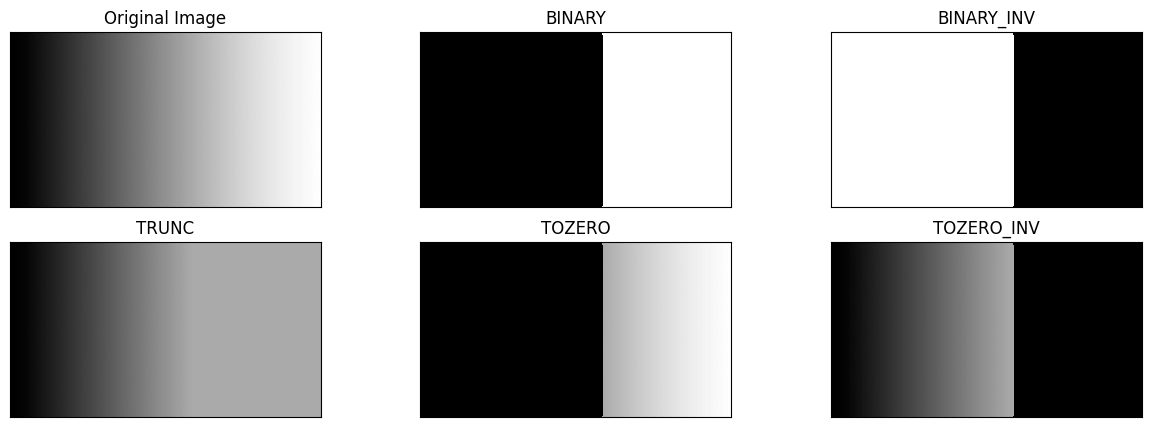

In [4]:
filename = ('/content/drive/MyDrive/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

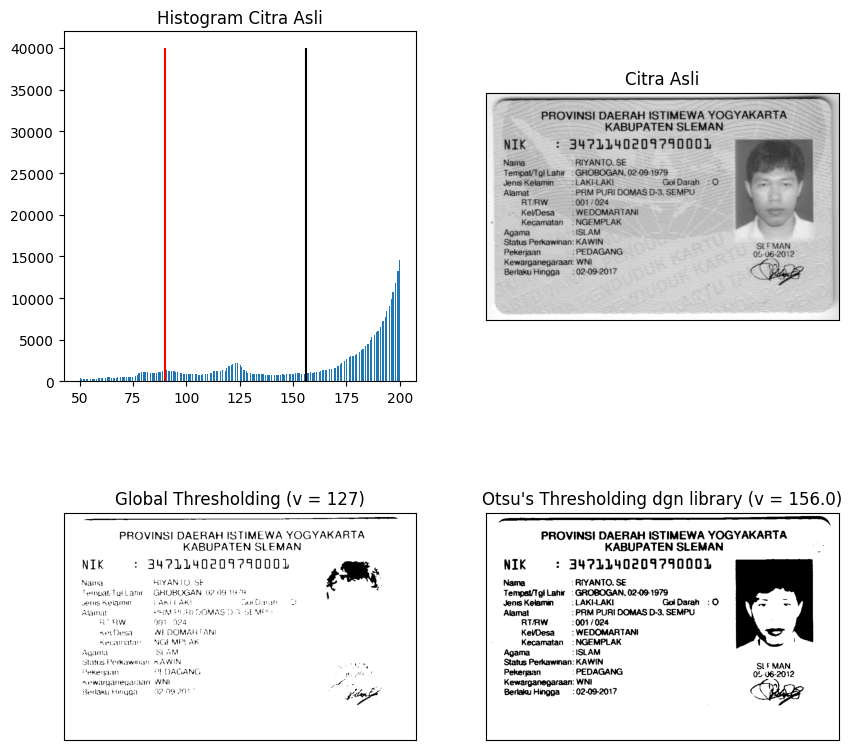

In [5]:
img2 = cv.imread('/content/drive/MyDrive/Images/ktp/ktp.png', 0)
blur = cv.GaussianBlur(img2, (5,5), 0)
thresh = 90

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]

citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')

for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

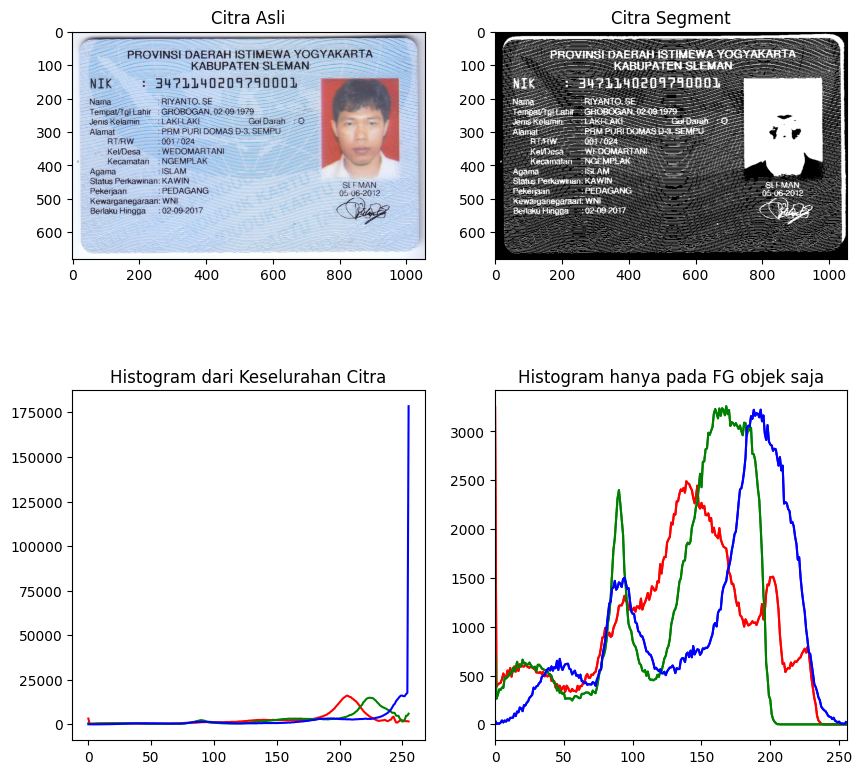

In [6]:
img3 = cv.imread('/content/drive/MyDrive/Images/ktp/ktp.png')
img_rgb = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2, 2, 1), plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r', 'g', 'b')

for i, col in enumerate(color):
  hist0 = cv.calcHist([img_rgb], [i], None, [256], [0,256])
  plt.subplot(2, 2, 3), plt.plot(hist0, color = col)
  plt.title('Histogram dari Keselurahan Citra')
  hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])

plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7a878c62e260>)

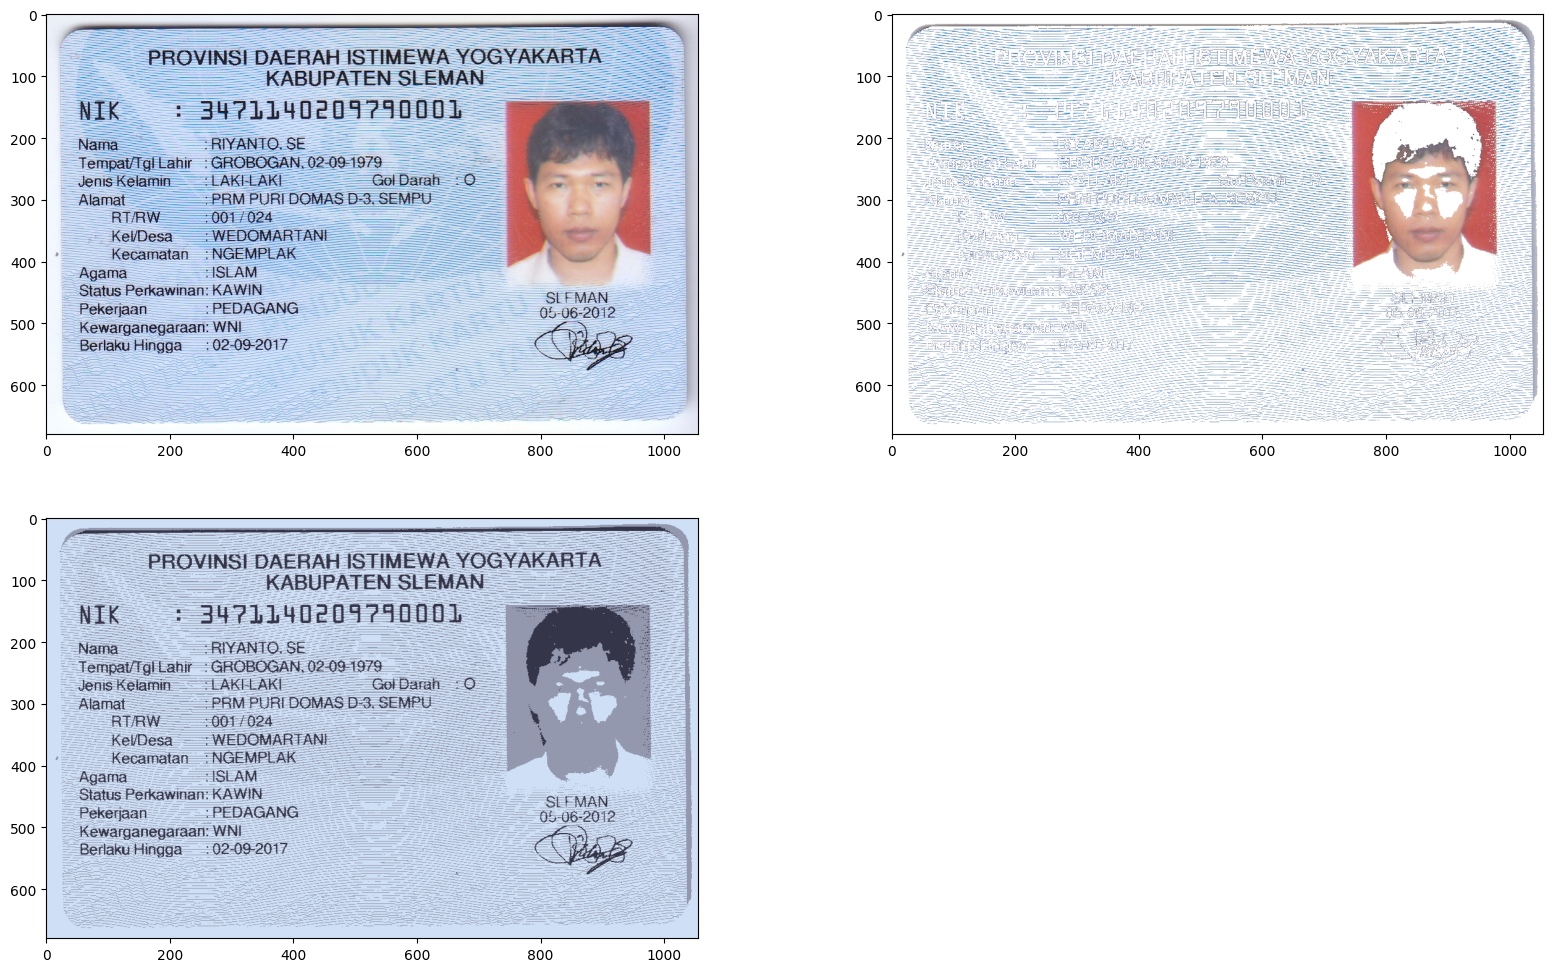

In [8]:
# Kmeans Image Segmentation
img = cv.imread('/content/drive/MyDrive/Images/ktp/ktp.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# reshape array ke bentuk 2D
pixel_val = img.reshape((-1, 3))
# convert to float
pixel_val = np.float32(pixel_val)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, labels, (centers) = cv.kmeans(pixel_val, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
# Konversi titik centroid ke dalam Integer
centers = np.uint8(centers)
# flattening label array
labels = labels.flatten()
# konversi warna pixel asli ke warna dari tiap centroidnya
segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(img.shape)

masked_img = np.copy(img)
masked_img = masked_img.reshape((-1, 3))
# cluster = 2
masked_img[labels != 2] = [255, 255, 255]
masked_img = masked_img.reshape(img.shape)

plt.figure(figsize = (20, 12))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.subplot(2, 2, 2), plt.imshow(masked_img)
plt.subplot(2, 2, 3), plt.imshow(segmented_img)